In [1]:
import numpy as np
import pandas as pd
import keras
import sklearn
from keras.layers import Dense, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.metrics import mean_squared_error
#plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')
#sns.set(style = 'ticks', context = 'talk')
%matplotlib inline

2022-10-13 00:54:00.701301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-13 00:54:01.221627: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-13 00:54:01.221660: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-13 00:54:01.295576: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-13 00:54:03.312119: W tensorflow/stream_executor/pla

In [2]:
diamond_data_file_path = 'diamonds.csv'
diamond_data = pd.read_csv(diamond_data_file_path)
#Drop Unnamed column
diamond_data = diamond_data.drop('Unnamed: 0', axis=1)
diamond_data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [3]:
diamond_data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [4]:
diamond_data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
encoder = LabelEncoder()

encoder.fit(diamond_data['cut'])
diamond_data['cut'] = encoder.transform(diamond_data['cut'])

encoder.fit(diamond_data['color'])
diamond_data['color'] = encoder.transform(diamond_data['color'])

encoder.fit(diamond_data['clarity'])
diamond_data['clarity'] = encoder.transform(diamond_data['clarity'])

diamond_data.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [7]:
X = diamond_data.drop(['price'], axis = 1)
y = diamond_data['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

In [10]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=[9]),
    keras.layers.Dense(80, activation='relu'), 
    keras.layers.Dense(90, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1),
])

2022-10-13 00:54:07.914349: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-13 00:54:07.914419: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-13 00:54:07.914462: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-10-13 00:54:07.915236: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.compile(
    optimizer="adam",
    loss="mae",
)

In [12]:
history = model.fit(
    X_train, y_train,
    validation_split = 0.15,
    batch_size=15,
    epochs=100,
)

Epoch 1/100
2293/2293 [==============================] - 27s 11ms/step - loss: 778.3122 - val_loss: 560.1267
Epoch 2/100
2293/2293 [==============================] - 23s 10ms/step - loss: 534.6506 - val_loss: 527.9665
Epoch 3/100
2293/2293 [==============================] - 24s 10ms/step - loss: 512.2240 - val_loss: 527.0300
Epoch 4/100
2293/2293 [==============================] - 21s 9ms/step - loss: 503.2290 - val_loss: 527.9649
Epoch 5/100
2293/2293 [==============================] - 21s 9ms/step - loss: 489.4672 - val_loss: 525.5559
Epoch 6/100
2293/2293 [==============================] - 22s 10ms/step - loss: 476.8874 - val_loss: 486.0550
Epoch 7/100
2293/2293 [==============================] - 23s 10ms/step - loss: 463.5877 - val_loss: 470.4297
Epoch 8/100
2293/2293 [==============================] - 23s 10ms/step - loss: 453.3923 - val_loss: 470.4030
Epoch 9/100
2293/2293 [==============================] - 23s 10ms/step - loss: 439.1141 - val_loss: 448.6742
Epoch 10/100
2293/229

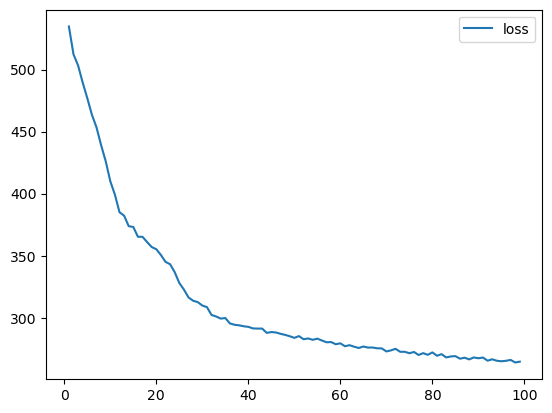

In [13]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 1. You can change this to get a different view.
history_df.loc[1:, ['loss']].plot();